# Data and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import itertools

colors = sns.color_palette("Dark2")

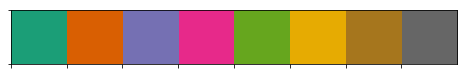

In [2]:
sns.palplot(colors)

## User Functions

In [3]:
def generate_data(n1 = 100, 
                  n2 = 100, 
                  mu1 = [1, 1], 
                  mu2 = [-1, -1], 
                  cov = 1.75*np.eye(2), 
                 ):
    np.random.seed(1)
                   
    # Plot multivariate normal with same covariance structure.
    Z1 = np.random.multivariate_normal(mu1, cov, n1)
    Z2 = np.random.multivariate_normal(mu2, cov, n2)
    
    return Z1, Z2

def generate_dataM(n1 = 100, 
                   n2 = 100, 
                   mu1 = [[0, 0],[1, 1]],
                   mu2 = [[-1, 1], [1, -1]],
                   cov = [0.25*np.eye(2) for i in range(4)], 
                  ):
    np.random.seed(2)
                   
    # Plot multivariate normal with same covariance structure.
    Z11 = np.random.multivariate_normal(mu1[0], cov[0], n1)
    Z12 = np.random.multivariate_normal(mu1[1], cov[1], n1)
    
    Z21 = np.random.multivariate_normal(mu2[0], cov[2], n2)
    Z22 = np.random.multivariate_normal(mu2[1], cov[3], n2)
    
    Z1 = np.vstack([Z11, Z12])
    Z2 = np.vstack([Z21, Z22])
    return Z1, Z2

def plot_data(Z1, 
              Z2, 
              col1 = colors[0], 
              col2 = colors[2], 
              filename = None, 
              test_point = None, 
              opacity = 1, 
              lines = None, 
              project = False,
              color_lines = False,
              color_test_point = False,
              grid = False,
             ):
    sns.set()
    
    # Color data.
    n1 = Z1.shape[0]
    c1 = n1*[col1]
    n2 = Z2.shape[0]
    c2 = n2*[col2]
    
    lim = 5
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    
    # Mean of class 1.
    m1 = np.mean(Z1, axis = 0)
    m2 = np.mean(Z2, axis = 0)
    
    # Test point.
    if test_point:
        h = 'k'
        if color_test_point:
            if np.dot(m1, test_point) > np.dot(m2, test_point):
                h = col1
            else:
                h = col2
        ax.scatter(test_point[0], test_point[1], s=120, c=h, marker='o')
        
    # Data.
    ax.scatter(Z1[:, 0], Z1[:, 1], alpha = opacity, s=90, marker='.', c=c1)
    ax.scatter(Z2[:, 0], Z2[:, 1], alpha = opacity, s=90, marker='.', c=c2)
    ax.set_ylim(-lim, lim)
    ax.set_xlim(-lim, lim)
    ax.set_aspect('equal')
    
    # Representation lines.
    if lines:
        for line in lines:
            xmin = -lim*line[0]
            xmax = (lim + 0.05)*line[0]
            ymin = -lim*line[1]
            ymax = (lim + 0.05)*line[1]
            h1 = 'k'
            h2 = 'k'
            if color_lines:
                # Color lines according to class colors.
                if np.dot(m1, line) > 0:
                    h1 = col1
                    h2 = col2
                else:
                    h1 = col2
                    h2 = col1
            ax.plot(np.linspace(0, xmax, 10), np.linspace(0, ymax, 10), c=h1, alpha=0.75)
            ax.plot(np.linspace(xmin, 0, 10), np.linspace(ymin, 0, 10), c=h2, alpha=0.75)
            if project:
                proj = np.dot(np.array(test_point), np.array(line)) * np.array(line) / np.dot(np.array(line), np.array(line))
                ax.scatter(proj[0], proj[1], s = 100, marker='*', c=h)
                # Plot line from test point to projection.
                ax.plot(np.linspace(test_point[0], proj[0], 10), np.linspace(test_point[1], proj[1], 10), c='k', linestyle = '--', alpha=0.75)

    ax.set_yticks([])
    ax.set_xticks([])

    plt.tight_layout()

    if True:
        ax.grid(True)
        #ax.grid(color = 'black', ls = '-.', lw = 0.25)
        
    if filename: plt.savefig(filename, dpi = 500)

## Gen Data

In [4]:
Z1, Z2 = generate_data()

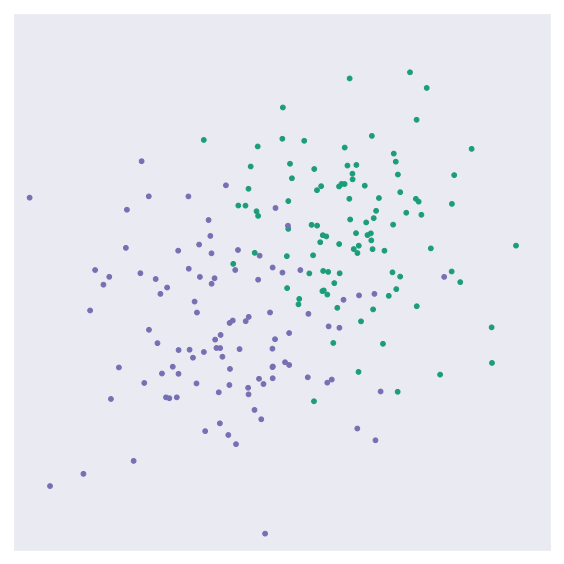

In [5]:
# Figure 1: Data

filename = 's2.png'
plot_data(Z1, 
          Z2, 
          filename = filename, 
          test_point = None)

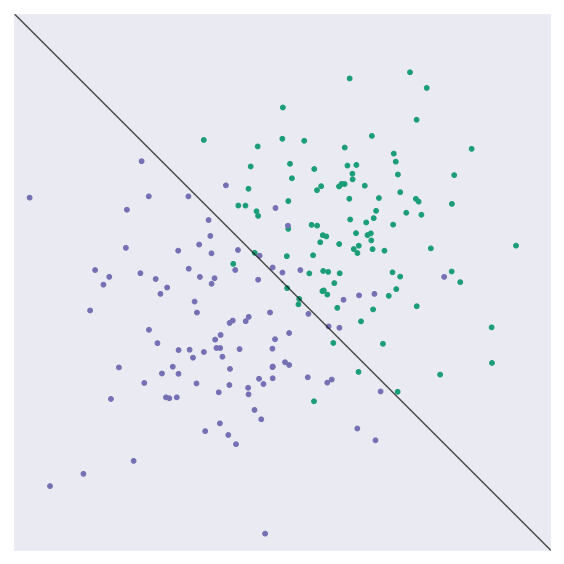

In [6]:
# Figure 2: Optimal Decision Boundary

lines = [[-1,1]]
filename = 's3.png'
plot_data(Z1, 
          Z2, 
          filename = filename, 
          test_point = None, 
          lines = lines, 
          opacity = 1)

In [7]:
mu1 = [[0,0], [0,0]]
mu2 = [[-1,1], [1,-1]]

cov = [
       np.asarray([[0.1,0],[0,2]]), 
       np.asarray([[2,0],[0,0.1]]), 
       np.asarray([[0.2,0.1],[0.1,0.3]]), 
       np.asarray([[0.2,0.05],[0.05,0.1]]), 
       #0.2 * np.eye(2), 
       #0.15*np.eye(2)
      ]

Z1, Z2 = generate_dataM(mu1 = mu1, mu2 = mu2, cov = cov)

In [8]:
#cov = [np.diag([1,1]), np.diag([1,0.1]), np.asarray([[1,0.5], [0.5,1]]), np.asarray([[0.5, 0.25], [0.25,1]])]
#cov = [0.1*np.asarray([[0.5,0],[0,4]]), 0.18*np.eye(2), 0.2 * np.eye(2), 0.15*np.eye(2)]
#
#Z1, Z2 = generate_dataM(cov = cov)
#lines = [[-1,1]]
#filename = 's4.png'
#plot_data(Z1, 
#          Z2, 
#          filename = filename, 
#          test_point = None, 
#          opacity = 1)

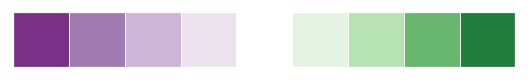

In [9]:
colors = sns.color_palette("PRGn", 8)
colors = colors[0:4] + [(1,1,1)] + colors[4:8]
sns.palplot(colors)

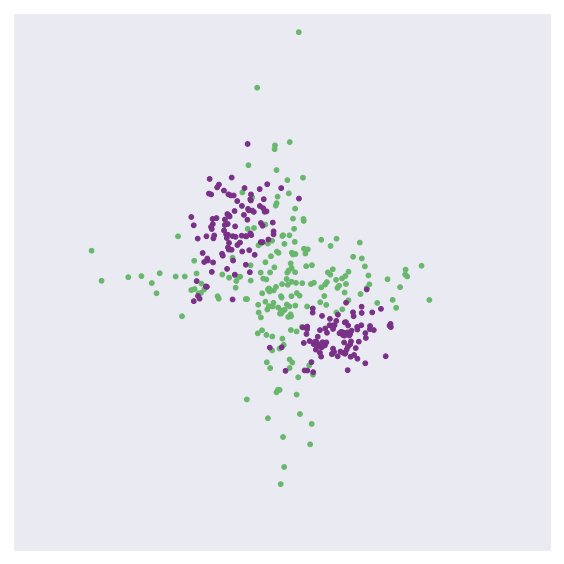

In [10]:
#cov = [np.diag([1,1]), np.diag([1,0.1]), np.asarray([[1,0.5], [0.5,1]]), np.asarray([[0.5, 0.25], [0.25,1]])]
lines = [[-1,1]]
filename = 's4.png'
plot_data(Z1, 
          Z2, 
          col1 = colors[7],
          col2 = colors[0],
          filename = filename, 
          test_point = None, 
          opacity = 1,
          grid = True)

In [11]:
ZZ = np.vstack([Z1,Z2])
xedges0 = np.linspace(-6,6,15, True)
yedges0 = np.linspace(-6,6,15, True)

x1 = Z1[:, 0]#np.vstack([Z1,Z2])[:, 0]
y1 = Z1[:, 1]#np.vstack([Z1,Z2])[:, 1]

x2 = Z2[:, 0]#np.vstack([Z1,Z2])[:, 0]
y2 = Z2[:, 1]#np.vstack([Z1,Z2])[:, 1]

H1, xedges1, yedges1 = np.histogram2d(x1, y1, bins=(xedges0, yedges0))
H2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(xedges0, yedges0))

A = H1.T + H2.T
B = np.zeros(A.shape) + 0.5

for ai in range(A.shape[0]):
    for bi in range(A.shape[1]):
        if A[ai, bi] != 0:
            B[ai,bi] = H1.T[ai,bi] / A[ai,bi]
    
A = B

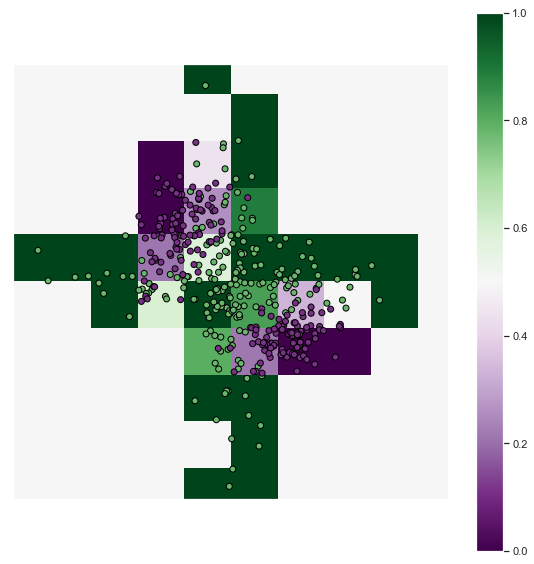

In [12]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 15),
                     np.linspace(-6, 6, 15))

X = np.vstack([Z1, Z2])#rng.randn(200, 2)
Y = [colors[7] for i in range(200)] + [colors[0] for i in range(200)]#np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.set_aspect('equal')
Z = A

plt.subplot(1, 1, 1)
image = plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   aspect='equal', origin='lower', cmap=plt.cm.PRGn)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolors=(0, 0, 0))

plt.xticks(())
plt.yticks(())

plt.axis([-4, 4, -4, 4])
plt.colorbar(image)

plt.tight_layout()
plt.savefig('s5.png', dpi = 500)
plt.show()

## Rotated

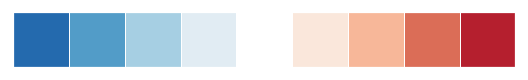

In [13]:
colors = sns.color_palette("RdBu_r", 8)
colors = colors[0:4] + [(1,1,1)] + colors[4:8]
sns.palplot(colors)

In [14]:
from math import sqrt
rot = 1.0 / sqrt(2)
R = np.asarray([[rot, -rot],[rot, rot]])
Z3 = Z1 @ R
Z4 = Z2 @ R


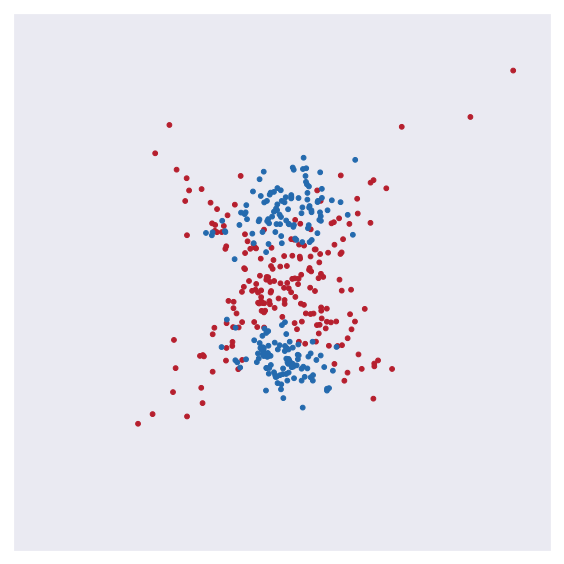

In [15]:
filename = 's6.png'
plot_data(Z3, 
          Z4, 
          col1 = colors[8],
          col2 = colors[0],
          filename = filename, 
          test_point = None, 
          opacity = 1,
          grid = True)

In [16]:
ZZ = np.vstack([Z1,Z2])
xedges0 = np.linspace(-6,6,15, True)
yedges0 = np.linspace(-6,6,15, True)

x1 = Z3[:, 0]#np.vstack([Z1,Z2])[:, 0]
y1 = Z3[:, 1]#np.vstack([Z1,Z2])[:, 1]

x2 = Z4[:, 0]#np.vstack([Z1,Z2])[:, 0]
y2 = Z4[:, 1]#np.vstack([Z1,Z2])[:, 1]

H1, xedges1, yedges1 = np.histogram2d(x1, y1, bins=(xedges0, yedges0))
H2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(xedges0, yedges0))

A = H1.T + H2.T
B = np.zeros(A.shape) + 0.5

for ai in range(A.shape[0]):
    for bi in range(A.shape[1]):
        if A[ai, bi] != 0:
            B[ai,bi] = H1.T[ai,bi] / A[ai,bi]
    
A = B

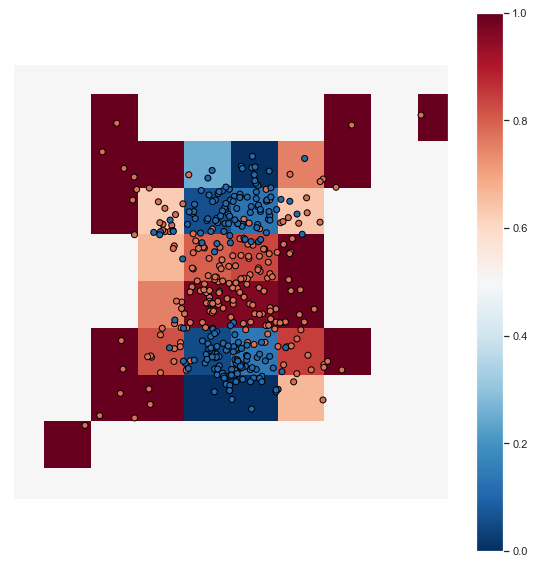

In [17]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 15),
                     np.linspace(-6, 6, 15))

X = np.vstack([Z3, Z4])#rng.randn(200, 2)
Y = [colors[7] for i in range(200)] + [colors[0] for i in range(200)]#np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.set_aspect('equal')
Z = A

plt.subplot(1, 1, 1)
image = plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   aspect='equal', origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolors=(0, 0, 0))

plt.xticks(())
plt.yticks(())

plt.axis([-4, 4, -4, 4])
plt.colorbar(image)

plt.tight_layout()
plt.savefig('s7.png', dpi = 500)
plt.show()

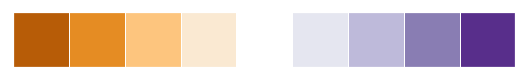

In [18]:
ZZ1 = np.vstack([Z1, Z3])
ZZ2 = np.vstack([Z2, Z4])

colors = sns.color_palette("PuOr", 8)
colors = colors[0:4] + [(1,1,1)] + colors[4:8]
sns.palplot(colors)


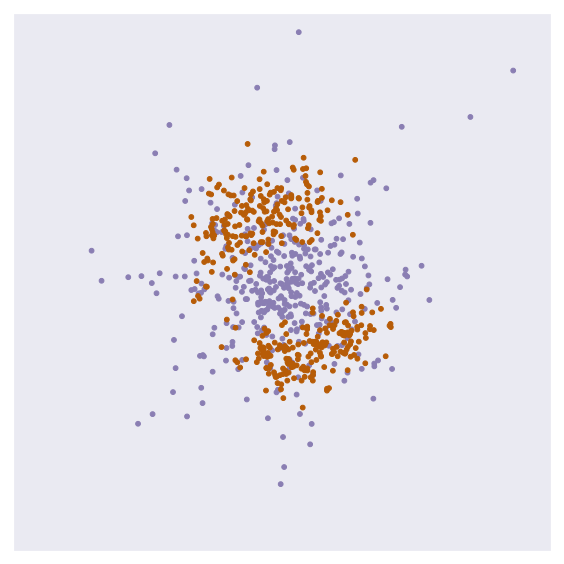

In [19]:
filename = 's8.png'
plot_data(ZZ1, 
          ZZ2, 
          col1 = colors[7],
          col2 = colors[0],
          filename = filename, 
          test_point = None, 
          opacity = 1,
          grid = True)

In [20]:
ZZZ = np.vstack([ZZ1,ZZ2])
xedges0 = np.linspace(-6,6,15, True)
yedges0 = np.linspace(-6,6,15, True)

x1 = ZZ1[:, 0]#np.vstack([Z1,Z2])[:, 0]
y1 = ZZ1[:, 1]#np.vstack([Z1,Z2])[:, 1]

x2 = ZZ2[:, 0]#np.vstack([Z1,Z2])[:, 0]
y2 = ZZ2[:, 1]#np.vstack([Z1,Z2])[:, 1]

H1, xedges1, yedges1 = np.histogram2d(x1, y1, bins=(xedges0, yedges0))
H2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(xedges0, yedges0))

A = H1.T + H2.T
B = np.zeros(A.shape) + 0.5

for ai in range(A.shape[0]):
    for bi in range(A.shape[1]):
        if A[ai, bi] != 0:
            B[ai,bi] = H1.T[ai,bi] / A[ai,bi]
    
A = B

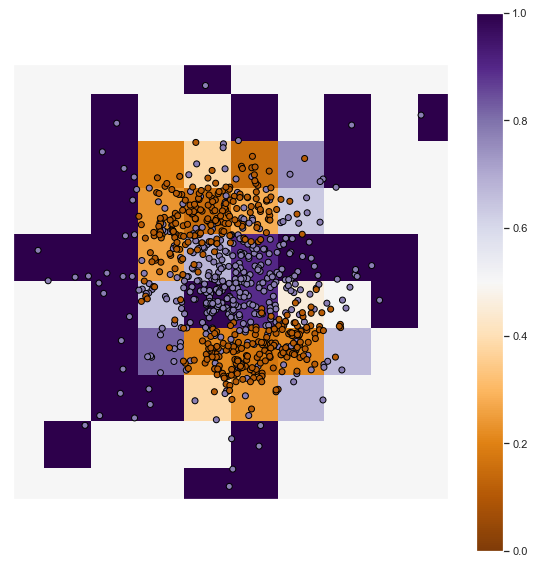

In [21]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 15),
                     np.linspace(-6, 6, 15))

X = np.vstack([ZZ1, ZZ2])#rng.randn(200, 2)
nr = int(X.shape[0]/2)
Y = [colors[7] for i in range(nr)] + [colors[0] for i in range(nr)]#np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.set_aspect('equal')
Z = A

plt.subplot(1, 1, 1)
image = plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   aspect='equal', origin='lower', cmap=plt.cm.PuOr,
                   vmin = 0, vmax =1
                   )

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolors=(0, 0, 0))

plt.clim([0,1])
plt.xticks(())
plt.yticks(())

plt.axis([-4, 4, -4, 4])
plt.colorbar(image)

plt.tight_layout()
plt.savefig('s9.png', dpi = 500)
plt.show()